In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
# Завантаження даних
data = pd.read_csv("Product Analyst Test Task Data - Task 2.csv")

In [15]:
# Перетворення дати в номер тижня
data['cohort_week'] = pd.to_datetime(data['cohort_week']).dt.isocalendar().week

In [16]:
# Розрахунок фактичного LTV для кожної когорти
ltv_df = data.groupby('cohort_week').agg({'user_id': 'nunique', 'product_id': 'count'})
ltv_df['ltv'] = ltv_df['product_id'] / ltv_df['user_id']

In [17]:
# Побудова моделі для прогнозу LTV
X = ltv_df.index.values.reshape(-1, 1)
y = ltv_df['ltv']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [19]:
# Прогноз LTV на рік
weeks_in_year = 52
forecast_weeks = range(1, weeks_in_year + 1)
forecast_ltv = model.predict(pd.DataFrame(forecast_weeks).values.reshape(-1, 1))

In [21]:
forecast_ltv

array([ 9.55561821,  9.35417975,  9.15274129,  8.95130283,  8.74986437,
        8.54842591,  8.34698746,  8.145549  ,  7.94411054,  7.74267208,
        7.54123362,  7.33979516,  7.1383567 ,  6.93691825,  6.73547979,
        6.53404133,  6.33260287,  6.13116441,  5.92972595,  5.7282875 ,
        5.52684904,  5.32541058,  5.12397212,  4.92253366,  4.7210952 ,
        4.51965674,  4.31821829,  4.11677983,  3.91534137,  3.71390291,
        3.51246445,  3.31102599,  3.10958753,  2.90814908,  2.70671062,
        2.50527216,  2.3038337 ,  2.10239524,  1.90095678,  1.69951833,
        1.49807987,  1.29664141,  1.09520295,  0.89376449,  0.69232603,
        0.49088757,  0.28944912,  0.08801066, -0.1134278 , -0.31486626,
       -0.51630472, -0.71774318])

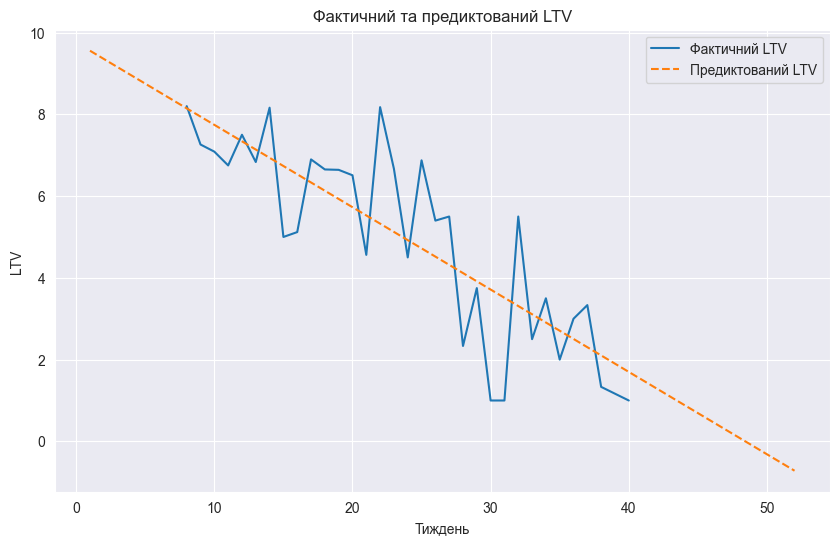

In [20]:
# Візуалізація
plt.figure(figsize=(10, 6))
plt.plot(ltv_df.index, ltv_df['ltv'], label='Фактичний LTV')
plt.plot(forecast_weeks, forecast_ltv, label='Предиктований LTV', linestyle='--')
plt.xlabel('Тиждень')
plt.ylabel('LTV')
plt.title('Фактичний та предиктований LTV')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
#Оцінюємо якість моделі

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Передбачення LTV на тренувальному наборі даних
train_predicted_ltv = model.predict(X)

# Розрахунок метрик якості
r2 = r2_score(y, train_predicted_ltv)
rmse = mean_squared_error(y, train_predicted_ltv, squared=False)
mae = mean_absolute_error(y, train_predicted_ltv)

print("Коефіцієнт детермінації (R^2):", r2)
print("Середньоквадратична помилка (RMSE):", rmse)
print("Середня абсолютна помилка (MAE):", mae)


Коефіцієнт детермінації (R^2): 0.6764380150513392
Середньоквадратична помилка (RMSE): 1.2938508778565065
Середня абсолютна помилка (MAE): 1.0582346183405178


In [23]:
from sklearn.model_selection import cross_val_score

# Крос-валідація з 5 фолдами
cv_scores = cross_val_score(model, X, y, cv=5)
print("Середнє значення крос-валідації:", cv_scores.mean())

Середнє значення крос-валідації: -0.7341590179857315


In [24]:
#Отже, обраний підхід для побудови моделі передбачення LTV базується на лінійній регресії, де номер тижня виступає як незалежна змінна, а фактичний LTV - залежна. 
#Після навчання моделі вона використовується для прогнозу предиктованого LTV на наступні тижні.

In [ ]:
'''
Протягом перших 10 тижнів значно вищий, ніж фактичний LTV. Це може свідчити про те, що модель переоцінює LTV на початкових етапах або дані про LTV мають нелінійну залежність від номера тижня або малу кількість даних для якістної оцінки і тд.

Згодом прогнозований LTV стає ближчим до фактичного LTV. Це може означати, що модель "навчається" з часом або нелінійність даних стає менш вираженою
'''

In [ ]:
#Для оцінки якості побудованої моделі можна використати коефіцієнт детермінації (R^2), середньоквадратичну помилку (RMSE) та середню абсолютну помилку (MAE)
#Також провів крос-валідацію для оцінки стабільності моделі і підтвердження її точності.

In [ ]:
'''
Отримані результати оцінки моделі можна пояснити наступним чином:

Значення R^2 вказує на те, наскільки добре модель пояснює варіацію залежної змінної. Значення R^2 знаходиться між 0 і 1, де 1 означає ідеальне підгонку моделі до даних. R^2 дорівнює 0.68, що означає, що приблизно 68% варіації фактичного LTV може бути пояснено моделлю. Це досить непогане значення, але модель може бути покращена для кращого пояснення варіації.

RMSE вимірює середнє квадратичне відхилення між фактичними і передбаченими значеннями. Чим менше значення RMSE, тим краще модель. RMSE дорівнює приблизно 1.29, що означає, що середня помилка моделі складає приблизно 1.29 одиниці в одиницях LTV. Чим ближче це значення до 0, тим краще.

MAE вимірює середню абсолютну різницю між фактичними і передбаченими значеннями. Значення MAE дорівнює приблизно 1.06, що означає, що середня абсолютна різниця між фактичними і передбаченими значеннями складає 1.06 одиниць LTV.

Значення крос-валідації вказує на середнє значення R^2 при перехресній перевірці моделі. Значення -0.73 говорить про те, що модель може бути недооціненою або взагалі непридатною для цих даних. Це може бути викликано перенавчанням моделі або недостатньою кількістю даних для навчання.

'''

In [ ]:
'''
Щоб покращити точність моделі треба використати більш складну модель, збільшити обсяги даних, провести додатковий аналіз даних, створити нові ознаки на основі 
існуючих даних, які можуть краще відображати взаємозв'язки між змінними
'''